# 직종_중분류 없는 지역별 취업현황 데이터 전처리

In [1]:
import pandas as pd

In [11]:
# 데이터 로드
sheet_name=0

df_12 = pd.read_excel("취업현황 11~12.xlsx", sheet_name=sheet_name)
df_16 = pd.read_excel("취업현황 12~16.xlsx", sheet_name=sheet_name)
df_20 = pd.read_excel("취업현황 16~20.xlsx", sheet_name=sheet_name)
df_24 = pd.read_excel("취업현황 20~24.xlsx", sheet_name=sheet_name)

In [134]:
import pandas as pd
# 월별 구인인원, 구직건수 컬럼 생성(이중 컬럼 제거)
def generate_date_columns(start_year, start_month, end_year, end_month):
    columns = []
    current_year = start_year
    current_month = start_month

    while current_year < end_year or (current_year == end_year and current_month <= end_month):
        columns.append(f"{current_year}년_{current_month}월_구인인원")
        columns.append(f"{current_year}년_{current_month}월_구직건수")

        if current_month == 12:
            current_month = 1
            current_year += 1
        else:
            current_month += 1
    return columns

# 2020~2024 데이터 정제
def clean_job_data(file_path, sheet_name=0, start_year=2020, start_month=3, end_year=2024, end_month=3):
    # 데이터셋 로드
    df = pd.read_excel(file_path, sheet_name=sheet_name)
    
    # 쓸데 없는 컬럼, 로우 제거
    df = df.dropna(how='all', axis=1)  
    df = df.dropna(how='all')   
    
    # 함수에서 설정한 날짜 범위로 날짜 열 생성
    date_columns = generate_date_columns(start_year, start_month, end_year, end_month)
    
    # 현재 데이터프레임의 컬럼 수와 맞추기 위해 날짜 열 목록을 조정합니다.
    # 필요한 열 수 계산
    required_columns = len(df.columns) - 1  # 첫 번째 열은 '지역'으로 설정
    date_columns = date_columns[:required_columns]
    
    # 컬럼 합치기
    column_names = ["지역"] + date_columns
    
    # 컬럼 이름 변경
    df.columns = column_names
    
    # 인덱스 초기화
    df = df.reset_index(drop=True)
    
    return df

# 2020 ~ 2024 데이터
file_path = '취업현황 20~24.xlsx'
df_24 = clean_job_data(file_path)
df_24.head()


,지역,2020년_3월_구인인원,2020년_3월_구직건수,2020년_4월_구인인원,2020년_4월_구직건수,2020년_5월_구인인원,2020년_5월_구직건수,2020년_6월_구인인원,2020년_6월_구직건수,2020년_7월_구인인원,...,2023년_11월_구인인원,2023년_11월_구직건수,2023년_12월_구인인원,2023년_12월_구직건수,2024년_1월_구인인원,2024년_1월_구직건수,2024년_2월_구인인원,2024년_2월_구직건수,2024년_3월_구인인원,2024년_3월_구직건수
0,(지역별)시군구,구인인원(월),구직건수(월),구인인원(월),구직건수(월),구인인원(월),구직건수(월),구인인원(월),구직건수(월),구인인원(월),...,구인인원(월),구직건수(월),구인인원(월),구직건수(월),구인인원(월),구직건수(월),구인인원(월),구직건수(월),구인인원(월),구직건수(월)
1,서울특별시 종로구,563,706,483,642,529,623,621,638,657,...,1124,776,872,719,1229,1114,1524,647,1119,898
2,서울특별시 중구,623,625,877,600,1291,531,705,669,940,...,1266,762,1045,662,1272,940,1005,596,1342,777
3,서울특별시 용산구,625,1206,394,1363,564,1223,751,1458,679,...,808,1133,671,1030,835,1571,788,1022,788,1099
4,서울특별시 성동구,617,1621,506,1379,553,1334,571,1425,626,...,984,1917,1001,1518,830,2151,1014,1491,997,1740


In [135]:
# 첫 번째 행을 제거
df_24 = df_24.drop(0).reset_index(drop=True)

# 최종 데이터를 확인
df_24.head()

,지역,2020년_3월_구인인원,2020년_3월_구직건수,2020년_4월_구인인원,2020년_4월_구직건수,2020년_5월_구인인원,2020년_5월_구직건수,2020년_6월_구인인원,2020년_6월_구직건수,2020년_7월_구인인원,...,2023년_11월_구인인원,2023년_11월_구직건수,2023년_12월_구인인원,2023년_12월_구직건수,2024년_1월_구인인원,2024년_1월_구직건수,2024년_2월_구인인원,2024년_2월_구직건수,2024년_3월_구인인원,2024년_3월_구직건수
0,서울특별시 종로구,563,706,483,642,529,623,621,638,657,...,1124,776,872,719,1229,1114,1524,647,1119,898
1,서울특별시 중구,623,625,877,600,1291,531,705,669,940,...,1266,762,1045,662,1272,940,1005,596,1342,777
2,서울특별시 용산구,625,1206,394,1363,564,1223,751,1458,679,...,808,1133,671,1030,835,1571,788,1022,788,1099
3,서울특별시 성동구,617,1621,506,1379,553,1334,571,1425,626,...,984,1917,1001,1518,830,2151,1014,1491,997,1740
4,서울특별시 광진구,300,2451,269,2291,338,2111,527,2116,500,...,1825,2266,987,2132,606,3347,573,2137,546,2521


In [136]:
import pandas as pd

def generate_date_columns(start_year, start_month, end_year, end_month):
    columns = []
    current_year = start_year
    current_month = start_month

    while current_year < end_year or (current_year == end_year and current_month <= end_month):
        columns.append(f"{current_year}년_{current_month}월_구인인원")
        columns.append(f"{current_year}년_{current_month}월_구직건수")

        if current_month == 12:
            current_month = 1
            current_year += 1
        else:
            current_month += 1
    return columns

# 2016~2020 데이터 정제
def clean_job_data(file_path, sheet_name=0, start_year=2016, start_month=3, end_year=2020, end_month=2):
    # 데이터셋 로드
    df = pd.read_excel(file_path, sheet_name=sheet_name)
    
    # 쓸데 없는 컬럼, 로우 제거
    df = df.dropna(how='all', axis=1)  
    df = df.dropna(how='all')   
    
    # 함수에서 설정한 날짜 범위로 날짜 열 생성
    date_columns = generate_date_columns(start_year, start_month, end_year, end_month)
    
    # 현재 데이터프레임의 컬럼 수와 맞추기 위해 날짜 열 목록을 조정합니다.
    # 필요한 열 수 계산
    required_columns = len(df.columns) - 1  # 첫 번째 열은 '지역'으로 설정
    date_columns = date_columns[:required_columns]
    
    # 컬럼 합치기
    column_names = ["지역"] + date_columns
    
    # 컬럼 이름 변경
    df.columns = column_names
    
    # 인덱스 초기화
    df = df.reset_index(drop=True)
    
    return df

# 2016 ~ 2020 데이터
file_path = '취업현황 16~20.xlsx'
df_20 = clean_job_data(file_path)
df_20.head()

,지역,2016년_3월_구인인원,2016년_3월_구직건수,2016년_4월_구인인원,2016년_4월_구직건수,2016년_5월_구인인원,2016년_5월_구직건수,2016년_6월_구인인원,2016년_6월_구직건수,2016년_7월_구인인원,...,2019년_10월_구인인원,2019년_10월_구직건수,2019년_11월_구인인원,2019년_11월_구직건수,2019년_12월_구인인원,2019년_12월_구직건수,2020년_1월_구인인원,2020년_1월_구직건수,2020년_2월_구인인원,2020년_2월_구직건수
0,(지역별)시군구,구인인원(월),구직건수(월),구인인원(월),구직건수(월),구인인원(월),구직건수(월),구인인원(월),구직건수(월),구인인원(월),...,구인인원(월),구직건수(월),구인인원(월),구직건수(월),구인인원(월),구직건수(월),구인인원(월),구직건수(월),구인인원(월),구직건수(월)
1,서울특별시 종로구,992,1027,1063,1015,1022,783,1255,764,1207,...,793,600,697,547,683,719,691,821,760,587
2,서울특별시 중구,2102,802,1744,751,1831,707,1650,686,1707,...,1164,479,1129,543,819,420,891,691,1090,553
3,서울특별시 용산구,955,1585,1396,1253,1097,1125,1186,1131,907,...,736,935,718,1042,700,1026,911,1370,792,1069
4,서울특별시 성동구,1385,2430,1159,2086,1247,2085,1256,2334,816,...,1139,1506,855,1615,586,1397,679,1866,722,1423


In [137]:
# 첫 번째 행을 제거
df_20 = df_20.drop(0).reset_index(drop=True)

# 최종 데이터를 확인
df_20.head()

,지역,2016년_3월_구인인원,2016년_3월_구직건수,2016년_4월_구인인원,2016년_4월_구직건수,2016년_5월_구인인원,2016년_5월_구직건수,2016년_6월_구인인원,2016년_6월_구직건수,2016년_7월_구인인원,...,2019년_10월_구인인원,2019년_10월_구직건수,2019년_11월_구인인원,2019년_11월_구직건수,2019년_12월_구인인원,2019년_12월_구직건수,2020년_1월_구인인원,2020년_1월_구직건수,2020년_2월_구인인원,2020년_2월_구직건수
0,서울특별시 종로구,992,1027,1063,1015,1022,783,1255,764,1207,...,793,600,697,547,683,719,691,821,760,587
1,서울특별시 중구,2102,802,1744,751,1831,707,1650,686,1707,...,1164,479,1129,543,819,420,891,691,1090,553
2,서울특별시 용산구,955,1585,1396,1253,1097,1125,1186,1131,907,...,736,935,718,1042,700,1026,911,1370,792,1069
3,서울특별시 성동구,1385,2430,1159,2086,1247,2085,1256,2334,816,...,1139,1506,855,1615,586,1397,679,1866,722,1423
4,서울특별시 광진구,837,3299,892,2851,882,2885,784,2880,636,...,524,2071,482,2202,549,2157,542,2643,428,2088


In [138]:
import pandas as pd

def generate_date_columns(start_year, start_month, end_year, end_month):
    columns = []
    current_year = start_year
    current_month = start_month

    while current_year < end_year or (current_year == end_year and current_month <= end_month):
        columns.append(f"{current_year}년_{current_month}월_구인인원")
        columns.append(f"{current_year}년_{current_month}월_구직건수")
        if current_month == 12:
            current_month = 1
            current_year += 1
        else:
            current_month += 1
    return columns

# 2012 ~ 2016 데이터 정제
def clean_job_data(file_path, sheet_name=0, start_year=2012, start_month=3, end_year=2016, end_month=2):
    # 데이터셋 로드
    df = pd.read_excel(file_path, sheet_name=sheet_name)
    
    # 쓸데 없는 컬럼, 로우 제거
    df = df.dropna(how='all', axis=1)  
    df = df.dropna(how='all')   
    
    # 함수에서 설정한 날짜 범위로 날짜 열 생성
    date_columns = generate_date_columns(start_year, start_month, end_year, end_month)
    
    # 현재 데이터프레임의 컬럼 수와 맞추기 위해 날짜 열 목록을 조정합니다.
    # 필요한 열 수 계산
    required_columns = len(df.columns) - 1  # 첫 번째 열은 '지역'으로 설정
    date_columns = date_columns[:required_columns]
    
    # 컬럼 합치기
    column_names = ["지역"] + date_columns
    
    # 컬럼 이름 변경
    df.columns = column_names
    
    # 인덱스 초기화
    df = df.reset_index(drop=True)
    
    return df

# 2012 ~ 2016 데이터
file_path = '취업현황 12~16.xlsx'
df_16 = clean_job_data(file_path)
df_16.head()

,지역,2012년_3월_구인인원,2012년_3월_구직건수,2012년_4월_구인인원,2012년_4월_구직건수,2012년_5월_구인인원,2012년_5월_구직건수,2012년_6월_구인인원,2012년_6월_구직건수,2012년_7월_구인인원,...,2015년_10월_구인인원,2015년_10월_구직건수,2015년_11월_구인인원,2015년_11월_구직건수,2015년_12월_구인인원,2015년_12월_구직건수,2016년_1월_구인인원,2016년_1월_구직건수,2016년_2월_구인인원,2016년_2월_구직건수
0,(지역별)시군구,구인인원(월),구직건수(월),구인인원(월),구직건수(월),구인인원(월),구직건수(월),구인인원(월),구직건수(월),구인인원(월),...,구인인원(월),구직건수(월),구인인원(월),구직건수(월),구인인원(월),구직건수(월),구인인원(월),구직건수(월),구인인원(월),구직건수(월)
1,서울특별시 종로구,1031,869,804,841,716,821,921,825,774,...,947,881,1420,825,780,945,815,974,945,815
2,서울특별시 중구,2220,899,3239,678,2601,708,1889,785,2045,...,3837,779,2105,965,1843,790,2264,896,2210,770
3,서울특별시 용산구,832,1097,1218,883,968,796,1603,769,2137,...,1041,1382,1025,1239,723,1399,703,1523,828,1265
4,서울특별시 성동구,1644,1532,974,1441,1148,1528,875,1406,866,...,1462,2298,1547,2418,1306,2179,813,2642,842,1733


In [139]:
# 첫 번째 행을 제거
df_16 = df_16.drop(0).reset_index(drop=True)

# 최종 데이터를 확인
df_16.head()

,지역,2012년_3월_구인인원,2012년_3월_구직건수,2012년_4월_구인인원,2012년_4월_구직건수,2012년_5월_구인인원,2012년_5월_구직건수,2012년_6월_구인인원,2012년_6월_구직건수,2012년_7월_구인인원,...,2015년_10월_구인인원,2015년_10월_구직건수,2015년_11월_구인인원,2015년_11월_구직건수,2015년_12월_구인인원,2015년_12월_구직건수,2016년_1월_구인인원,2016년_1월_구직건수,2016년_2월_구인인원,2016년_2월_구직건수
0,서울특별시 종로구,1031,869,804,841,716,821,921,825,774,...,947,881,1420,825,780,945,815,974,945,815
1,서울특별시 중구,2220,899,3239,678,2601,708,1889,785,2045,...,3837,779,2105,965,1843,790,2264,896,2210,770
2,서울특별시 용산구,832,1097,1218,883,968,796,1603,769,2137,...,1041,1382,1025,1239,723,1399,703,1523,828,1265
3,서울특별시 성동구,1644,1532,974,1441,1148,1528,875,1406,866,...,1462,2298,1547,2418,1306,2179,813,2642,842,1733
4,서울특별시 광진구,511,2169,688,1967,905,2330,879,1996,756,...,947,2725,801,2430,994,2951,580,3433,852,2484


In [140]:
import pandas as pd

def generate_date_columns(start_year, start_month, end_year, end_month):
    columns = []
    current_year = start_year
    current_month = start_month

    while current_year < end_year or (current_year == end_year and current_month <= end_month):
        columns.append(f"{current_year}년_{current_month}월_구인인원")
        columns.append(f"{current_year}년_{current_month}월_구직건수")

        if current_month == 12:
            current_month = 1
            current_year += 1
        else:
            current_month += 1
    return columns

# 2011 ~ 2012 데이터 정제
def clean_job_data(file_path, sheet_name=0, start_year=2011, start_month=6, end_year=2012, end_month=2):
    # 데이터셋 로드
    df = pd.read_excel(file_path, sheet_name=sheet_name)
    
    # 쓸데 없는 컬럼, 로우 제거
    df = df.dropna(how='all', axis=1)  
    df = df.dropna(how='all')   
    
    # 함수에서 설정한 날짜 범위로 날짜 열 생성
    date_columns = generate_date_columns(start_year, start_month, end_year, end_month)
    
    # 현재 데이터프레임의 컬럼 수와 맞추기 위해 날짜 열 목록을 조정합니다.
    # 필요한 열 수 계산
    required_columns = len(df.columns) - 1  # 첫 번째 열은 '지역'으로 설정
    date_columns = date_columns[:required_columns]
    
    # 컬럼 합치기
    column_names = ["지역"] + date_columns
    
    # 컬럼 이름 변경
    df.columns = column_names
    
    # 인덱스 초기화
    df = df.reset_index(drop=True)
    
    return df

# 2011 ~ 2012 데이터
file_path = '취업현황 11~12.xlsx'
df_12 = clean_job_data(file_path)

# 첫 번째 행을 제거.
df_12 = df_12.drop(0).reset_index(drop=True)

# 최종 데이터 확인
df_12.head()

,지역,2011년_6월_구인인원,2011년_6월_구직건수,2011년_7월_구인인원,2011년_7월_구직건수,2011년_8월_구인인원,2011년_8월_구직건수,2011년_9월_구인인원,2011년_9월_구직건수,2011년_10월_구인인원,2011년_10월_구직건수,2011년_11월_구인인원,2011년_11월_구직건수,2011년_12월_구인인원,2011년_12월_구직건수,2012년_1월_구인인원,2012년_1월_구직건수,2012년_2월_구인인원,2012년_2월_구직건수
0,서울특별시 종로구,1046,867,819,747,1101,856,714,808,762,893,1024,838,885,974,602,891,922,797
1,서울특별시 중구,2314,656,1919,666,1805,720,2117,731,1518,650,2013,579,1809,798,1429,678,1956,739
2,서울특별시 용산구,778,1357,953,1126,1241,1111,857,1086,618,950,790,906,667,1062,754,1091,994,896
3,서울특별시 성동구,987,1820,877,1432,1219,1580,1117,1539,1009,1385,752,1561,601,1509,706,1395,1038,1407
4,서울특별시 광진구,936,2417,737,1971,917,2198,579,2016,803,1998,513,2134,961,1948,517,1963,896,2040


In [141]:
# 시기 별로 지역의 이름이 바뀌어 개수가 모두 다름

print(df_12['지역'].nunique())
print(df_16['지역'].nunique())
print(df_20['지역'].nunique())
print(df_24['지역'].nunique())

264
266
263
258


In [142]:
# 2011 ~ 2012년 데이터의 지역 확인
area_12 = set(df_12['지역'].unique())
area_12

{'(구)경기도 여주군',
 '강원특별자치도 강릉시',
 '강원특별자치도 고성군',
 '강원특별자치도 동해시',
 '강원특별자치도 삼척시',
 '강원특별자치도 속초시',
 '강원특별자치도 양구군',
 '강원특별자치도 양양군',
 '강원특별자치도 영월군',
 '강원특별자치도 원주시',
 '강원특별자치도 인제군',
 '강원특별자치도 정선군',
 '강원특별자치도 철원군',
 '강원특별자치도 춘천시',
 '강원특별자치도 태백시',
 '강원특별자치도 평창군',
 '강원특별자치도 홍천군',
 '강원특별자치도 화천군',
 '강원특별자치도 횡성군',
 '경기도 가평군',
 '경기도 고양시',
 '경기도 고양시 덕양구',
 '경기도 고양시 일산동구',
 '경기도 고양시 일산서구',
 '경기도 과천시',
 '경기도 광명시',
 '경기도 광주시',
 '경기도 구리시',
 '경기도 군포시',
 '경기도 김포시',
 '경기도 남양주시',
 '경기도 동두천시',
 '경기도 부천시',
 '경기도 부천시 소사구',
 '경기도 부천시 오정구',
 '경기도 부천시 원미구',
 '경기도 성남시',
 '경기도 성남시 분당구',
 '경기도 성남시 수정구',
 '경기도 성남시 중원구',
 '경기도 수원시',
 '경기도 수원시 권선구',
 '경기도 수원시 영통구',
 '경기도 수원시 장안구',
 '경기도 수원시 팔달구',
 '경기도 시흥시',
 '경기도 안산시',
 '경기도 안산시 단원구',
 '경기도 안산시 상록구',
 '경기도 안성시',
 '경기도 안양시',
 '경기도 안양시 동안구',
 '경기도 안양시 만안구',
 '경기도 양주시',
 '경기도 양평군',
 '경기도 연천군',
 '경기도 오산시',
 '경기도 용인시',
 '경기도 용인시 기흥구',
 '경기도 용인시 수지구',
 '경기도 용인시 처인구',
 '경기도 의왕시',
 '경기도 의정부시',
 '경기도 이천시',
 '경기도 파주시',
 '경기도 평택시',
 '경기도 포천시',
 '경기도 하남시',
 '경기도 화성시',
 '경상남도 거제시',

In [143]:
# 2012 ~ 2016년 데이터의 지역 확인
area_16 = set(df_16['지역'].unique())

area_16

{'(구)경기도 고양시 일산구',
 '(구)경기도 여주군',
 '강원특별자치도 강릉시',
 '강원특별자치도 고성군',
 '강원특별자치도 동해시',
 '강원특별자치도 삼척시',
 '강원특별자치도 속초시',
 '강원특별자치도 양구군',
 '강원특별자치도 양양군',
 '강원특별자치도 영월군',
 '강원특별자치도 원주시',
 '강원특별자치도 인제군',
 '강원특별자치도 정선군',
 '강원특별자치도 철원군',
 '강원특별자치도 춘천시',
 '강원특별자치도 태백시',
 '강원특별자치도 평창군',
 '강원특별자치도 홍천군',
 '강원특별자치도 화천군',
 '강원특별자치도 횡성군',
 '경기도 가평군',
 '경기도 고양시',
 '경기도 고양시 덕양구',
 '경기도 고양시 일산동구',
 '경기도 고양시 일산서구',
 '경기도 과천시',
 '경기도 광명시',
 '경기도 광주시',
 '경기도 구리시',
 '경기도 군포시',
 '경기도 김포시',
 '경기도 남양주시',
 '경기도 동두천시',
 '경기도 부천시',
 '경기도 부천시 소사구',
 '경기도 부천시 오정구',
 '경기도 부천시 원미구',
 '경기도 성남시',
 '경기도 성남시 분당구',
 '경기도 성남시 수정구',
 '경기도 성남시 중원구',
 '경기도 수원시',
 '경기도 수원시 권선구',
 '경기도 수원시 영통구',
 '경기도 수원시 장안구',
 '경기도 수원시 팔달구',
 '경기도 시흥시',
 '경기도 안산시',
 '경기도 안산시 단원구',
 '경기도 안산시 상록구',
 '경기도 안성시',
 '경기도 안양시',
 '경기도 안양시 동안구',
 '경기도 안양시 만안구',
 '경기도 양주시',
 '경기도 양평군',
 '경기도 여주시',
 '경기도 연천군',
 '경기도 오산시',
 '경기도 용인시',
 '경기도 용인시 기흥구',
 '경기도 용인시 수지구',
 '경기도 용인시 처인구',
 '경기도 의왕시',
 '경기도 의정부시',
 '경기도 이천시',
 '경기도 파주시',
 '경기도 평택시',
 '경기도 포천시',
 '경기도

In [144]:
# 2016 ~ 2020년 데이터의 지역 확인
area_20 = set(df_20['지역'].unique())

area_20

{'강원특별자치도 강릉시',
 '강원특별자치도 고성군',
 '강원특별자치도 동해시',
 '강원특별자치도 삼척시',
 '강원특별자치도 속초시',
 '강원특별자치도 양구군',
 '강원특별자치도 양양군',
 '강원특별자치도 영월군',
 '강원특별자치도 원주시',
 '강원특별자치도 인제군',
 '강원특별자치도 정선군',
 '강원특별자치도 철원군',
 '강원특별자치도 춘천시',
 '강원특별자치도 태백시',
 '강원특별자치도 평창군',
 '강원특별자치도 홍천군',
 '강원특별자치도 화천군',
 '강원특별자치도 횡성군',
 '경기도 가평군',
 '경기도 고양시 덕양구',
 '경기도 고양시 일산동구',
 '경기도 고양시 일산서구',
 '경기도 과천시',
 '경기도 광명시',
 '경기도 광주시',
 '경기도 구리시',
 '경기도 군포시',
 '경기도 김포시',
 '경기도 남양주시',
 '경기도 동두천시',
 '경기도 부천시',
 '경기도 부천시 소사구',
 '경기도 부천시 오정구',
 '경기도 부천시 원미구',
 '경기도 성남시',
 '경기도 성남시 분당구',
 '경기도 성남시 수정구',
 '경기도 성남시 중원구',
 '경기도 수원시',
 '경기도 수원시 권선구',
 '경기도 수원시 영통구',
 '경기도 수원시 장안구',
 '경기도 수원시 팔달구',
 '경기도 시흥시',
 '경기도 안산시',
 '경기도 안산시 단원구',
 '경기도 안산시 상록구',
 '경기도 안성시',
 '경기도 안양시',
 '경기도 안양시 동안구',
 '경기도 안양시 만안구',
 '경기도 양주시',
 '경기도 양평군',
 '경기도 여주시',
 '경기도 연천군',
 '경기도 오산시',
 '경기도 용인시',
 '경기도 용인시 기흥구',
 '경기도 용인시 수지구',
 '경기도 용인시 처인구',
 '경기도 의왕시',
 '경기도 의정부시',
 '경기도 이천시',
 '경기도 파주시',
 '경기도 평택시',
 '경기도 포천시',
 '경기도 하남시',
 '경기도 화성시',
 '경상남도 거제시',
 '경상남도 거창군',
 

In [145]:
# 2020 ~ 2024년 데이터의 지역 확인

area_24 = set(df_24['지역'].unique())

area_24

{'강원특별자치도 강릉시',
 '강원특별자치도 고성군',
 '강원특별자치도 동해시',
 '강원특별자치도 삼척시',
 '강원특별자치도 속초시',
 '강원특별자치도 양구군',
 '강원특별자치도 양양군',
 '강원특별자치도 영월군',
 '강원특별자치도 원주시',
 '강원특별자치도 인제군',
 '강원특별자치도 정선군',
 '강원특별자치도 철원군',
 '강원특별자치도 춘천시',
 '강원특별자치도 태백시',
 '강원특별자치도 평창군',
 '강원특별자치도 홍천군',
 '강원특별자치도 화천군',
 '강원특별자치도 횡성군',
 '경기도 가평군',
 '경기도 고양시 덕양구',
 '경기도 고양시 일산동구',
 '경기도 고양시 일산서구',
 '경기도 과천시',
 '경기도 광명시',
 '경기도 광주시',
 '경기도 구리시',
 '경기도 군포시',
 '경기도 김포시',
 '경기도 남양주시',
 '경기도 동두천시',
 '경기도 부천시',
 '경기도 부천시 소사구',
 '경기도 부천시 오정구',
 '경기도 부천시 원미구',
 '경기도 성남시 분당구',
 '경기도 성남시 수정구',
 '경기도 성남시 중원구',
 '경기도 수원시 권선구',
 '경기도 수원시 영통구',
 '경기도 수원시 장안구',
 '경기도 수원시 팔달구',
 '경기도 시흥시',
 '경기도 안산시 단원구',
 '경기도 안산시 상록구',
 '경기도 안성시',
 '경기도 안양시 동안구',
 '경기도 안양시 만안구',
 '경기도 양주시',
 '경기도 양평군',
 '경기도 여주시',
 '경기도 연천군',
 '경기도 오산시',
 '경기도 용인시 기흥구',
 '경기도 용인시 수지구',
 '경기도 용인시 처인구',
 '경기도 의왕시',
 '경기도 의정부시',
 '경기도 이천시',
 '경기도 파주시',
 '경기도 평택시',
 '경기도 포천시',
 '경기도 하남시',
 '경기도 화성시',
 '경상남도 거제시',
 '경상남도 거창군',
 '경상남도 고성군',
 '경상남도 김해시',
 '경상남도 남해군',
 '경상남도 밀양시',
 '경상남도 사천

In [147]:
# 우선 데이터 join

merged_df = df_12.merge(df_16, on='지역', how='outer') \
                 .merge(df_20, on='지역', how='outer') \
                 .merge(df_24, on='지역', how='outer')

merged_df.head()

,지역,2011년_6월_구인인원,2011년_6월_구직건수,2011년_7월_구인인원,2011년_7월_구직건수,2011년_8월_구인인원,2011년_8월_구직건수,2011년_9월_구인인원,2011년_9월_구직건수,2011년_10월_구인인원,...,2023년_11월_구인인원,2023년_11월_구직건수,2023년_12월_구인인원,2023년_12월_구직건수,2024년_1월_구인인원,2024년_1월_구직건수,2024년_2월_구인인원,2024년_2월_구직건수,2024년_3월_구인인원,2024년_3월_구직건수
0,서울특별시 종로구,1046,867,819,747,1101,856,714,808,762,...,1124,776,872,719,1229,1114,1524,647,1119,898
1,서울특별시 중구,2314,656,1919,666,1805,720,2117,731,1518,...,1266,762,1045,662,1272,940,1005,596,1342,777
2,서울특별시 용산구,778,1357,953,1126,1241,1111,857,1086,618,...,808,1133,671,1030,835,1571,788,1022,788,1099
3,서울특별시 성동구,987,1820,877,1432,1219,1580,1117,1539,1009,...,984,1917,1001,1518,830,2151,1014,1491,997,1740
4,서울특별시 광진구,936,2417,737,1971,917,2198,579,2016,803,...,1825,2266,987,2132,606,3347,573,2137,546,2521


In [148]:
# 현재 상태 데이터의 지역명 개수 확인

print(merged_df['지역'].nunique())
print(merged_df['지역'].unique())

set1 = set(merged_df['지역'].unique())

268
['서울특별시 종로구' '서울특별시 중구' '서울특별시 용산구' '서울특별시 성동구' '서울특별시 광진구' '서울특별시 동대문구'
 '서울특별시 중랑구' '서울특별시 성북구' '서울특별시 강북구' '서울특별시 도봉구' '서울특별시 노원구' '서울특별시 은평구'
 '서울특별시 서대문구' '서울특별시 마포구' '서울특별시 양천구' '서울특별시 강서구' '서울특별시 구로구' '서울특별시 금천구'
 '서울특별시 영등포구' '서울특별시 동작구' '서울특별시 관악구' '서울특별시 서초구' '서울특별시 강남구' '서울특별시 송파구'
 '서울특별시 강동구' '부산광역시 중구' '부산광역시 서구' '부산광역시 동구' '부산광역시 영도구' '부산광역시 부산진구'
 '부산광역시 동래구' '부산광역시 남구' '부산광역시 북구' '부산광역시 해운대구' '부산광역시 사하구' '부산광역시 금정구'
 '부산광역시 강서구' '부산광역시 연제구' '부산광역시 수영구' '부산광역시 사상구' '부산광역시 기장군' '대구광역시 중구'
 '대구광역시 동구' '대구광역시 서구' '대구광역시 남구' '대구광역시 북구' '대구광역시 수성구' '대구광역시 달서구'
 '대구광역시 달성군' '인천광역시 중구' '인천광역시 동구' '인천광역시 미추홀구' '인천광역시 연수구' '인천광역시 남동구'
 '인천광역시 부평구' '인천광역시 계양구' '인천광역시 서구' '인천광역시 강화군' '인천광역시 옹진군' '광주광역시 동구'
 '광주광역시 서구' '광주광역시 남구' '광주광역시 북구' '광주광역시 광산구' '대전광역시 동구' '대전광역시 중구'
 '대전광역시 서구' '대전광역시 유성구' '대전광역시 대덕구' '울산광역시' '울산광역시 중구' '울산광역시 남구'
 '울산광역시 동구' '울산광역시 북구' '울산광역시 울주군' '세종특별자치시' '경기도 수원시' '경기도 수원시 장안구'
 '경기도 수원시 권선구' '경기도 수원시 팔달구' '경기도 수원시 영통구' '경기도 성남시' '경기도 성남시 수정구'
 '경기도

In [149]:
# merged_df.to_csv('전처리중.csv', index= False)

In [150]:
# 이름 변경 지역 (여주군 -> 여주시, 당진군 -> 당진시, 경북 군위군 -> 대구 군위군) 처리

merged_df['지역'] = merged_df['지역'].replace('(구)경기도 여주군', '경기도 여주시')
merged_df['지역'] = merged_df['지역'].replace('(구)충청남도 당진군', '충청남도 당진시')
merged_df['지역'] = merged_df['지역'].replace('경상북도 군위군', '대구광역시 군위군')

In [151]:
# '(구)경기도 고양시 일산구' 데이터를 '경기도 고양시 일산동구'와 '경기도 고양시 일산서구'에 각각 통합시키기

# '지역'이'(구)경기도 고양시 일산구'인 데이터 복사
ilsan_data = merged_df[merged_df['지역'] == '(구)경기도 고양시 일산구']

# '경기도 고양시 일산동구' and '경기도 고양시 일산서구'인 데이터를 저장하기 위해 엔트리 복사
ilsan_donggu = ilsan_data.copy()
ilsan_seogu = ilsan_data.copy()

# '경기도 고양시 일산동구' and '경기도 고양시 일산서구'인 곳만 추출
ilsan_donggu['지역'] = '경기도 고양시 일산동구'
ilsan_seogu['지역'] = '경기도 고양시 일산서구'

# 고양시 일산구 삭제
merged_df = merged_df[merged_df['지역'] != '(구)경기도 고양시 일산구']
# 일산 동구, 일산 서구 데이터를 기존 데이터에 합침
merged_df = pd.concat([merged_df, ilsan_donggu, ilsan_seogu], ignore_index=True)

# 현재 상태 데이터의 지역명 개수 확인
print(merged_df['지역'].nunique())
print(merged_df['지역'].unique())
set2 = set(merged_df['지역'].unique())

265
['서울특별시 종로구' '서울특별시 중구' '서울특별시 용산구' '서울특별시 성동구' '서울특별시 광진구' '서울특별시 동대문구'
 '서울특별시 중랑구' '서울특별시 성북구' '서울특별시 강북구' '서울특별시 도봉구' '서울특별시 노원구' '서울특별시 은평구'
 '서울특별시 서대문구' '서울특별시 마포구' '서울특별시 양천구' '서울특별시 강서구' '서울특별시 구로구' '서울특별시 금천구'
 '서울특별시 영등포구' '서울특별시 동작구' '서울특별시 관악구' '서울특별시 서초구' '서울특별시 강남구' '서울특별시 송파구'
 '서울특별시 강동구' '부산광역시 중구' '부산광역시 서구' '부산광역시 동구' '부산광역시 영도구' '부산광역시 부산진구'
 '부산광역시 동래구' '부산광역시 남구' '부산광역시 북구' '부산광역시 해운대구' '부산광역시 사하구' '부산광역시 금정구'
 '부산광역시 강서구' '부산광역시 연제구' '부산광역시 수영구' '부산광역시 사상구' '부산광역시 기장군' '대구광역시 중구'
 '대구광역시 동구' '대구광역시 서구' '대구광역시 남구' '대구광역시 북구' '대구광역시 수성구' '대구광역시 달서구'
 '대구광역시 달성군' '인천광역시 중구' '인천광역시 동구' '인천광역시 미추홀구' '인천광역시 연수구' '인천광역시 남동구'
 '인천광역시 부평구' '인천광역시 계양구' '인천광역시 서구' '인천광역시 강화군' '인천광역시 옹진군' '광주광역시 동구'
 '광주광역시 서구' '광주광역시 남구' '광주광역시 북구' '광주광역시 광산구' '대전광역시 동구' '대전광역시 중구'
 '대전광역시 서구' '대전광역시 유성구' '대전광역시 대덕구' '울산광역시' '울산광역시 중구' '울산광역시 남구'
 '울산광역시 동구' '울산광역시 북구' '울산광역시 울주군' '세종특별자치시' '경기도 수원시' '경기도 수원시 장안구'
 '경기도 수원시 권선구' '경기도 수원시 팔달구' '경기도 수원시 영통구' '경기도 성남시' '경기도 성남시 수정구'
 '경기도

In [152]:
# '지역' 별로 그룹화 하여 개수 합침(중복 열 제거)
merged_df = merged_df.groupby('지역').sum().reset_index()


# 현재 상태 데이터의 지역명 개수 확인
print(merged_df['지역'].nunique())
print(merged_df['지역'].unique())

set3 = set(merged_df['지역'].unique())

265
['강원특별자치도 강릉시' '강원특별자치도 고성군' '강원특별자치도 동해시' '강원특별자치도 삼척시' '강원특별자치도 속초시'
 '강원특별자치도 양구군' '강원특별자치도 양양군' '강원특별자치도 영월군' '강원특별자치도 원주시' '강원특별자치도 인제군'
 '강원특별자치도 정선군' '강원특별자치도 철원군' '강원특별자치도 춘천시' '강원특별자치도 태백시' '강원특별자치도 평창군'
 '강원특별자치도 홍천군' '강원특별자치도 화천군' '강원특별자치도 횡성군' '경기도 가평군' '경기도 고양시'
 '경기도 고양시 덕양구' '경기도 고양시 일산동구' '경기도 고양시 일산서구' '경기도 과천시' '경기도 광명시' '경기도 광주시'
 '경기도 구리시' '경기도 군포시' '경기도 김포시' '경기도 남양주시' '경기도 동두천시' '경기도 부천시'
 '경기도 부천시 소사구' '경기도 부천시 오정구' '경기도 부천시 원미구' '경기도 성남시' '경기도 성남시 분당구'
 '경기도 성남시 수정구' '경기도 성남시 중원구' '경기도 수원시' '경기도 수원시 권선구' '경기도 수원시 영통구'
 '경기도 수원시 장안구' '경기도 수원시 팔달구' '경기도 시흥시' '경기도 안산시' '경기도 안산시 단원구'
 '경기도 안산시 상록구' '경기도 안성시' '경기도 안양시' '경기도 안양시 동안구' '경기도 안양시 만안구' '경기도 양주시'
 '경기도 양평군' '경기도 여주시' '경기도 연천군' '경기도 오산시' '경기도 용인시' '경기도 용인시 기흥구'
 '경기도 용인시 수지구' '경기도 용인시 처인구' '경기도 의왕시' '경기도 의정부시' '경기도 이천시' '경기도 파주시'
 '경기도 평택시' '경기도 포천시' '경기도 하남시' '경기도 화성시' '경상남도 거제시' '경상남도 거창군' '경상남도 고성군'
 '경상남도 김해시' '경상남도 남해군' '경상남도 밀양시' '경상남도 사천시' '경상남도 산청군' '경상남도 양산시'
 '경상남도 의령군' '경상남도 진주시' '경상남도 창녕군' '경

In [153]:
# 구인인원이 포함된 컬럼들 뽑기
guin_columns = [col for col in merged_df.columns if '구인인원' in col]

# 지역명과 구인인원 합침
guin_data = merged_df[['지역'] + guin_columns]

guin_pivot = guin_data.melt(id_vars=['지역'], var_name='월', value_name='구인인원')

# 월 컬럼을 날짜 형식으로 변경
guin_pivot['월'] = guin_pivot['월'].str.replace('년_', '-').str.replace('월_구인인원', '')
guin_pivot['월'] = pd.to_datetime(guin_pivot['월'], format='%Y-%m')

# 피봇테이블 생성
pivot_table = guin_pivot.pivot_table(index='월', columns=['지역'], values='구인인원', aggfunc='sum')

# 저장
pivot_table.to_csv('구인인원피봇.csv')

In [155]:
# 구직건수가 포함된 컬럼들 뽑기
guin_columns = [col for col in merged_df.columns if '구직건수' in col]

# 지역명과 구직건수를 합침
guin_data = merged_df[['지역'] + guin_columns]


guin_pivot = guin_data.melt(id_vars=['지역'], var_name='월', value_name='구직건수')

# 월 컬름을 날짜 형식으로 변경
guin_pivot['월'] = guin_pivot['월'].str.replace('년_', '-').str.replace('월_구직건수', '')
guin_pivot['월'] = pd.to_datetime(guin_pivot['월'], format='%Y-%m')

# 피봇테이블 생성
pivot_table = guin_pivot.pivot_table(index='월', columns=['지역'], values='구직건수', aggfunc='sum')

# 저장
pivot_table.to_csv('구직건수피봇.csv')

# 지역별 구직인원 예측

Reloading Tuner from hyperband_dir\lstm_hyperband_tune\tuner0.json
Best units: 192
Best dropout_rate: 0.1
Best learning_rate: 0.01


C:\Download\anaconda\lib\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/150
4/4 - 8s - 2s/step - loss: 0.8971
Epoch 2/150
4/4 - 0s - 22ms/step - loss: 0.7125
Epoch 3/150
4/4 - 0s - 22ms/step - loss: 0.6291
Epoch 4/150
4/4 - 0s - 20ms/step - loss: 0.5920
Epoch 5/150
4/4 - 0s - 19ms/step - loss: 0.5551
Epoch 6/150
4/4 - 0s - 19ms/step - loss: 0.5214
Epoch 7/150
4/4 - 0s - 18ms/step - loss: 0.5111
Epoch 8/150
4/4 - 0s - 17ms/step - loss: 0.4879
Epoch 9/150
4/4 - 0s - 17ms/step - loss: 0.4787
Epoch 10/150
4/4 - 0s - 21ms/step - loss: 0.4527
Epoch 11/150
4/4 - 0s - 20ms/step - loss: 0.4430
Epoch 12/150
4/4 - 0s - 17ms/step - loss: 0.4182
Epoch 13/150
4/4 - 0s - 17ms/step - loss: 0.4137
Epoch 14/150
4/4 - 0s - 21ms/step - loss: 0.3863
Epoch 15/150
4/4 - 0s - 19ms/step - loss: 0.3769
Epoch 16/150
4/4 - 0s - 48ms/step - loss: 0.3594
Epoch 17/150
4/4 - 0s - 22ms/step - loss: 0.3451
Epoch 18/150
4/4 - 0s - 18ms/step - loss: 0.3283
Epoch 19/150
4/4 - 0s - 19ms/step - loss: 0.3223
Epoch 20/150
4/4 - 0s - 45ms/step - loss: 0.3143
Epoch 21/150
4/4 - 0s - 21ms/st

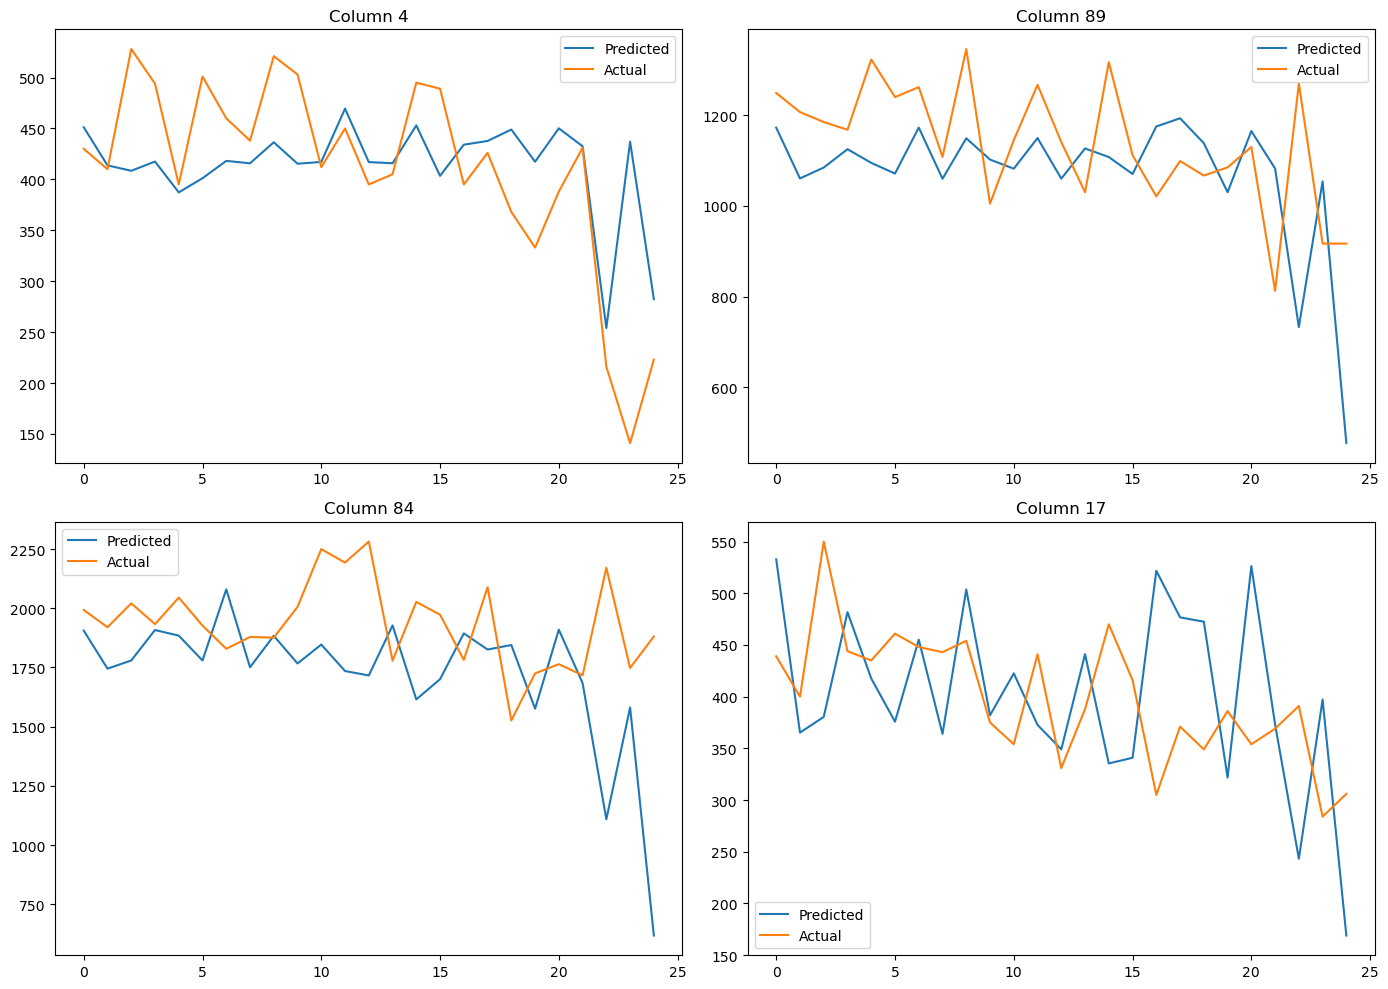

In [291]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense, Bidirectional, BatchNormalization
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import keras_tuner as kt
import os
import time

# 데이터 준비 함수
def prepare_data(filepath):
    df = pd.read_csv(filepath)
    df = df.drop([0, 1, 2])
    data = df.iloc[:, 1:].values.astype(float)
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data)
    
    # 데이터 나누기
    train_data = data_scaled[:125, :]
    test_data = data_scaled[125:, :]
    
    return train_data, test_data, scaler

# 데이터 준비
filepath = '구인인원피봇.csv'  # 파일 경로를 실제 파일 경로로 변경하세요
train_data, test_data, scaler = prepare_data(filepath)

# 모델 빌더 함수
def model_builder(hp):
    model = Sequential()
    units = hp.Int('units', min_value=32, max_value=256, step=32)
    dropout_rate = hp.Float('dropout_rate', min_value=0.0, max_value=0.5, step=0.1)
    learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

    model.add(Bidirectional(LSTM(units=units, return_sequences=True), input_shape=(1, train_data.shape[1])))
    model.add(Dropout(dropout_rate))
    model.add(BatchNormalization())
    model.add(LSTM(units=units//2, return_sequences=True))
    model.add(Dropout(dropout_rate/2))
    model.add(BatchNormalization())
    model.add(LSTM(units=units//2))
    model.add(Dense(train_data.shape[1]))
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(loss='mean_squared_error', optimizer=optimizer)
    
    return model

# 하이퍼파라미터 튜닝
def hyperparameter_tuning():
    tuner = kt.Hyperband(
        model_builder,
        objective='val_loss',
        max_epochs=50,
        factor=3,
        directory='hyperband_dir',
        project_name=f'lstm_hyperband_tune'  # 프로젝트 이름에 타임스탬프 추가
    )

    X_train = []
    y_train = []
    for i in range(len(train_data) - 1):
        X_train.append(train_data[i:i + 1, :])
        y_train.append(train_data[i + 1, :])
    X_train, y_train = np.array(X_train), np.array(y_train)

    tuner.search(X_train, y_train, epochs=50, validation_split=0.2)
    
    best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
    
    print(f"Best units: {best_hps.get('units')}")
    print(f"Best dropout_rate: {best_hps.get('dropout_rate')}")
    print(f"Best learning_rate: {best_hps.get('learning_rate')}")
    
    return best_hps

# 최적의 하이퍼파라미터로 모델 학습
best_hps = hyperparameter_tuning()
model = model_builder(best_hps)

# 데이터 준비
X_train = []
y_train = []
for i in range(len(train_data) - 1):
    X_train.append(train_data[i:i + 1, :])
    y_train.append(train_data[i + 1, :])
X_train, y_train = np.array(X_train), np.array(y_train)

# 모델 학습
model.fit(X_train, y_train, epochs=150, batch_size=32, verbose=2)

# LSTM 모델 테스트
def test_lstm_model(model, test_data, scaler):
    X_test = []
    y_test = []
    for i in range(len(test_data) - 1):
        X_test.append(test_data[i:i + 1, :])
        y_test.append(test_data[i + 1, :])
    X_test, y_test = np.array(X_test), np.array(y_test)
    
    y_pred_scaled = model.predict(X_test)
    
    y_pred = scaler.inverse_transform(y_pred_scaled)
    y_test_orig = scaler.inverse_transform(y_test)
    
    return y_pred, y_test_orig

# 모델 테스트
predictions, actual_values = test_lstm_model(model, test_data, scaler)

# 랜덤으로 4개 열 골라서 예측값 실제값 시각화
num_columns = test_data.shape[1]
selected_columns = np.random.choice(num_columns, size=4, replace=False)

plt.figure(figsize=(14, 10))
for i, col_idx in enumerate(selected_columns, 1):
    plt.subplot(2, 2, i)
    plt.plot(predictions[:, col_idx], label='Predicted')
    plt.plot(actual_values[:, col_idx], label='Actual')
    plt.title(f'Column {col_idx}')
    plt.legend()

plt.tight_layout()
plt.show()


In [293]:
# 성능 평가
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(actual_values.flatten(), predictions.flatten())
mse = mean_squared_error(actual_values.flatten(), predictions.flatten())
rmse = np.sqrt(mse)
r2 = r2_score(actual_values.flatten(), predictions.flatten())

print(f"\nAverage MAE: {mae}")
print(f"Average MSE: {mse}")
print(f"Average RMSE: {rmse}")
print(f"Average R²: {r2}")



Average MAE: 177.41137616028362
Average MSE: 112382.04651105302
Average RMSE: 335.2343158315584
Average R²: 0.9040440636252658


In [294]:
# 새로운 데이터 예측 함수
def predict_future(model, last_sequence, num_predictions, scaler):
    predictions = []
    current_sequence = last_sequence

    for _ in range(num_predictions):
        next_prediction = model.predict(current_sequence)
        predictions.append(next_prediction[0])
        
        # 다음 입력 시퀀스를 위해 current_sequence를 업데이트
        current_sequence = np.expand_dims(next_prediction, axis=0)

    predictions = np.array(predictions)
    predictions = scaler.inverse_transform(predictions)
    return predictions

# 마지막 테스트 시퀀스를 가져와 예측 시작
last_sequence = np.expand_dims(test_data[-1:], axis=0)
num_predictions = 12  # 1년치 예측

future_predictions = predict_future(model, last_sequence, num_predictions, scaler)

# 예측 결과 확인
print("Future Predictions (next 12 months):")
print(future_predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 784ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Future Predictions (next 12 months):
[[ 618.5161    106.8373     91.47269  ...  775.13605  1004.688
  1502.4536  ]
 [ 847.9853    143.43102   125.646736 ...  922.4679    954.1621
  1327.974   ]
 [ 965.9748    154.70085   100.27918  ...  986.1186   1079.1743
  1327.5057  ]
 ...
 [ 758.584      87.83201   154.09782  ...  752.5562    851.4124
  1503.0165  ]
 [ 758.3879     87.62577   153.523    ...  752.71173   850.0893
  1500.0802  ]
 [ 758.46075    87.73148   153.81007  ...  752.6912    850.8545
  1501.6461  ]]


In [295]:
# 열 이름을 불러오기 위해 기존 데이터 불러오기
df = pd.read_csv('구인인원피봇.csv')
new_columns = df.columns[1:] 
new_columns

Index(['강원특별자치도 강릉시', '강원특별자치도 고성군', '강원특별자치도 동해시', '강원특별자치도 삼척시',
       '강원특별자치도 속초시', '강원특별자치도 양구군', '강원특별자치도 양양군', '강원특별자치도 영월군',
       '강원특별자치도 원주시', '강원특별자치도 인제군',
       ...
       '충청북도 음성군', '충청북도 제천시', '충청북도 증평군', '충청북도 진천군', '충청북도 청주시',
       '충청북도 청주시 상당구', '충청북도 청주시 서원구', '충청북도 청주시 청원구', '충청북도 청주시 흥덕구',
       '충청북도 충주시'],
      dtype='object', length=265)

In [298]:
# 데이터 프레임으로 저장
future_gujik_df = pd.DataFrame(future_predictions, columns = new_columns)
new_dates = pd.date_range(start='2024-04-01', end='2025-03-01', freq='MS')
future_gujik_df.insert(0, '월', new_dates)
future_gujik_df = future_gujik_df.round(0)

# 숫자형 열만 선택
numeric_columns = future_gujik_df.select_dtypes(include=['float32', 'int64']).columns

# 숫자형 열에서 마이너스 값을 모두 0으로 변경
future_gujik_df[numeric_columns] = future_gujik_df[numeric_columns].applymap(lambda x: max(x, 0))

future_gujik_df.to_csv("구인예측찐막.csv", index = False)

# 지역별 구직건수 예측

Reloading Tuner from hyperband_dir\lstm_hyperband_tune2\tuner0.json
Best units: 224
Best dropout_rate: 0.30000000000000004
Best learning_rate: 0.001


C:\Download\anaconda\lib\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/150
4/4 - 9s - 2s/step - loss: 1.0247
Epoch 2/150
4/4 - 0s - 34ms/step - loss: 0.9856
Epoch 3/150
4/4 - 0s - 29ms/step - loss: 0.9451
Epoch 4/150
4/4 - 0s - 24ms/step - loss: 0.9054
Epoch 5/150
4/4 - 0s - 21ms/step - loss: 0.8461
Epoch 6/150
4/4 - 0s - 25ms/step - loss: 0.7925
Epoch 7/150
4/4 - 0s - 35ms/step - loss: 0.7364
Epoch 8/150
4/4 - 0s - 42ms/step - loss: 0.6800
Epoch 9/150
4/4 - 0s - 32ms/step - loss: 0.6267
Epoch 10/150
4/4 - 0s - 25ms/step - loss: 0.5864
Epoch 11/150
4/4 - 0s - 21ms/step - loss: 0.5507
Epoch 12/150
4/4 - 0s - 19ms/step - loss: 0.5308
Epoch 13/150
4/4 - 0s - 19ms/step - loss: 0.5112
Epoch 14/150
4/4 - 0s - 24ms/step - loss: 0.4858
Epoch 15/150
4/4 - 0s - 22ms/step - loss: 0.4822
Epoch 16/150
4/4 - 0s - 22ms/step - loss: 0.4626
Epoch 17/150
4/4 - 0s - 24ms/step - loss: 0.4546
Epoch 18/150
4/4 - 0s - 26ms/step - loss: 0.4396
Epoch 19/150
4/4 - 0s - 22ms/step - loss: 0.4348
Epoch 20/150
4/4 - 0s - 22ms/step - loss: 0.4230
Epoch 21/150
4/4 - 0s - 21ms/st

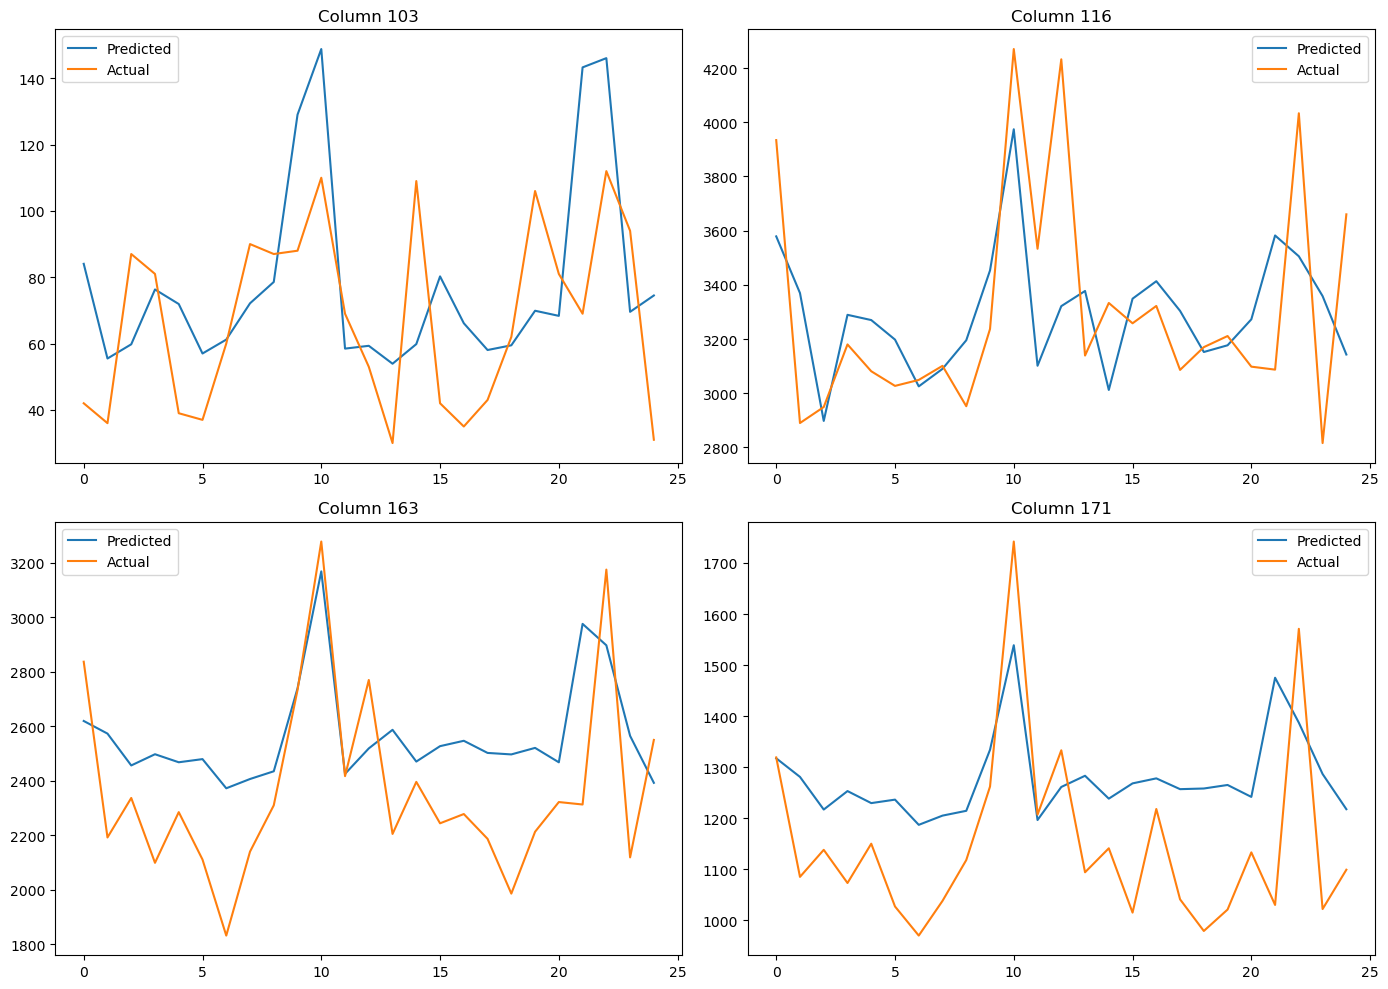

In [299]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense, Bidirectional, BatchNormalization
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import keras_tuner as kt
import os
import time

# 데이터 준비 함수
def prepare_data(filepath):
    df = pd.read_csv(filepath)
    df = df.drop([0, 1, 2])
    data = df.iloc[:, 1:].values.astype(float)
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data)
    
    # 데이터 나누기
    train_data = data_scaled[:125, :]
    test_data = data_scaled[125:, :]
    
    return train_data, test_data, scaler

# 데이터 준비
filepath = '구직건수피봇.csv'  # 파일 경로를 실제 파일 경로로 변경하세요
train_data, test_data, scaler = prepare_data(filepath)

# 모델 빌더 함수
def model_builder(hp):
    model = Sequential()
    units = hp.Int('units', min_value=32, max_value=256, step=32)
    dropout_rate = hp.Float('dropout_rate', min_value=0.0, max_value=0.5, step=0.1)
    learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

    model.add(Bidirectional(LSTM(units=units, return_sequences=True), input_shape=(1, train_data.shape[1])))
    model.add(Dropout(dropout_rate))
    model.add(BatchNormalization())
    model.add(LSTM(units=units//2, return_sequences=True))
    model.add(Dropout(dropout_rate/2))
    model.add(BatchNormalization())
    model.add(LSTM(units=units//2))
    model.add(Dense(train_data.shape[1]))
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(loss='mean_squared_error', optimizer=optimizer)
    
    return model

# 하이퍼파라미터 튜닝
def hyperparameter_tuning():
    tuner = kt.Hyperband(
        model_builder,
        objective='val_loss',
        max_epochs=50,
        factor=3,
        directory='hyperband_dir',
        project_name=f'lstm_hyperband_tune2'  # 프로젝트 이름에 타임스탬프 추가
    )

    X_train = []
    y_train = []
    for i in range(len(train_data) - 1):
        X_train.append(train_data[i:i + 1, :])
        y_train.append(train_data[i + 1, :])
    X_train, y_train = np.array(X_train), np.array(y_train)

    tuner.search(X_train, y_train, epochs=50, validation_split=0.2)
    
    best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
    
    print(f"Best units: {best_hps.get('units')}")
    print(f"Best dropout_rate: {best_hps.get('dropout_rate')}")
    print(f"Best learning_rate: {best_hps.get('learning_rate')}")
    
    return best_hps

# 최적의 하이퍼파라미터로 모델 학습
best_hps = hyperparameter_tuning()
model = model_builder(best_hps)

# 데이터 준비
X_train = []
y_train = []
for i in range(len(train_data) - 1):
    X_train.append(train_data[i:i + 1, :])
    y_train.append(train_data[i + 1, :])
X_train, y_train = np.array(X_train), np.array(y_train)

# 모델 학습
model.fit(X_train, y_train, epochs=150, batch_size=32, verbose=2)

# LSTM 모델 테스트
def test_lstm_model(model, test_data, scaler):
    X_test = []
    y_test = []
    for i in range(len(test_data) - 1):
        X_test.append(test_data[i:i + 1, :])
        y_test.append(test_data[i + 1, :])
    X_test, y_test = np.array(X_test), np.array(y_test)
    
    y_pred_scaled = model.predict(X_test)
    
    y_pred = scaler.inverse_transform(y_pred_scaled)
    y_test_orig = scaler.inverse_transform(y_test)
    
    return y_pred, y_test_orig

# 모델 테스트
predictions, actual_values = test_lstm_model(model, test_data, scaler)

# 랜덤으로 4개 열 골라서 예측값 실제값 시각화
num_columns = test_data.shape[1]
selected_columns = np.random.choice(num_columns, size=4, replace=False)

plt.figure(figsize=(14, 10))
for i, col_idx in enumerate(selected_columns, 1):
    plt.subplot(2, 2, i)
    plt.plot(predictions[:, col_idx], label='Predicted')
    plt.plot(actual_values[:, col_idx], label='Actual')
    plt.title(f'Column {col_idx}')
    plt.legend()

plt.tight_layout()
plt.show()


In [300]:
# 성능 평가
mae = mean_absolute_error(actual_values.flatten(), predictions.flatten())
mse = mean_squared_error(actual_values.flatten(), predictions.flatten())
rmse = np.sqrt(mse)
r2 = r2_score(actual_values.flatten(), predictions.flatten())

print(f"\nAverage MAE: {mae}")
print(f"Average MSE: {mse}")
print(f"Average RMSE: {rmse}")
print(f"Average R²: {r2}")


Average MAE: 185.98782509911894
Average MSE: 123139.84785249119
Average RMSE: 350.91287786641743
Average R²: 0.9379041122559956


In [289]:
# 새로운 데이터 예측 함수
def predict_future(model, last_sequence, num_predictions, scaler):
    predictions = []
    current_sequence = last_sequence

    for _ in range(num_predictions):
        next_prediction = model.predict(current_sequence)
        predictions.append(next_prediction[0])
        
        # 다음 입력 시퀀스를 위해 current_sequence를 업데이트
        current_sequence = np.expand_dims(next_prediction, axis=0)

    predictions = np.array(predictions)
    predictions = scaler.inverse_transform(predictions)
    return predictions

# 마지막 테스트 시퀀스를 가져와 예측 시작
last_sequence = np.expand_dims(test_data[-1:], axis=0)
num_predictions = 12  # 1년치 예측

future_predictions = predict_future(model, last_sequence, num_predictions, scaler)

# 예측 결과 확인
print("Future Predictions (next 12 months):")
print(future_predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Future Predictions (next 12 months):
[[1642.6423     79.927025  671.45306  ... 1585.684    2217.0288
  1694.7654  ]
 [1517.7004     89.08557   621.2568   ... 1516.9454   2147.8804
  1584.9998  ]
 [1484.3906    103.04849   617.3859   ... 1503.8517   2096.086
  1590.4259  ]
 ...
 [1560.4005    115.06331   652.2881   ... 1577.8959   2220.897
  1633.8063  ]
 [1558.5404    112.583595  650.2298   ... 1574.6562   2222.0466
  1628.317   ]
 [1548.6604    111.00165   646.0496   ... 1565.0577   2209.9175
  1623.33    ]]


In [285]:
# 동일 작업
df = pd.read_csv('구직건수피봇.csv')
new_columns = df.columns[1:] 
new_columns

Index(['강원특별자치도 강릉시', '강원특별자치도 고성군', '강원특별자치도 동해시', '강원특별자치도 삼척시',
       '강원특별자치도 속초시', '강원특별자치도 양구군', '강원특별자치도 양양군', '강원특별자치도 영월군',
       '강원특별자치도 원주시', '강원특별자치도 인제군',
       ...
       '충청북도 음성군', '충청북도 제천시', '충청북도 증평군', '충청북도 진천군', '충청북도 청주시',
       '충청북도 청주시 상당구', '충청북도 청주시 서원구', '충청북도 청주시 청원구', '충청북도 청주시 흥덕구',
       '충청북도 충주시'],
      dtype='object', length=265)

In [288]:
# 데이터 프레임으로 저장
future_gujik_df = pd.DataFrame(future_predictions, columns = new_columns)
new_dates = pd.date_range(start='2024-04-01', end='2025-03-01', freq='MS')
future_gujik_df.insert(0, '월', new_dates)
future_gujik_df = future_gujik_df.round(0)

# 숫자형 열만 선택
numeric_columns = future_gujik_df.select_dtypes(include=['float32', 'int64']).columns

# 숫자형 열에서 마이너스 값을 모두 0으로 변경
future_gujik_df[numeric_columns] = future_gujik_df[numeric_columns].applymap(lambda x: max(x, 0))

future_gujik_df.to_csv("구직예측찐막.csv", index = False)

In [302]:
# 성능 평가
mae = mean_absolute_error(actual_values.flatten(), predictions.flatten())
mse = mean_squared_error(actual_values.flatten(), predictions.flatten())
rmse = np.sqrt(mse)
r2 = r2_score(actual_values.flatten(), predictions.flatten())

print(f"\nAverage MAE: {mae}")
print(f"Average MSE: {mse}")
print(f"Average RMSE: {rmse}")
print(f"Average R²: {r2}")


Average MAE: 191.4227597799576
Average MSE: 132310.74559966085
Average RMSE: 363.745440658245
Average R²: 0.9332794919811503


# 추후과제 (지역별 구인구직현황 예측)

Epoch 1/50


C:\Download\anaconda\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0490
Epoch 2/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0330
Epoch 3/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0352
Epoch 4/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0360
Epoch 5/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0342
Epoch 6/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0386
Epoch 7/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0325
Epoch 8/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0283
Epoch 9/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0255
Epoch 10/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0253
Epoch 11/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0273
Epoch 12/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0341
Epoch 13/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0377
Epoch 14/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0267
Epoch 15/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0236


C:\Download\anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49436 (\N{HANGUL SYLLABLE SEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Download\anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50872 (\N{HANGUL SYLLABLE UL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Download\anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 53945 (\N{HANGUL SYLLABLE TEUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Download\anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Download\anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Download\anaconda\lib\site-packages\IPyth

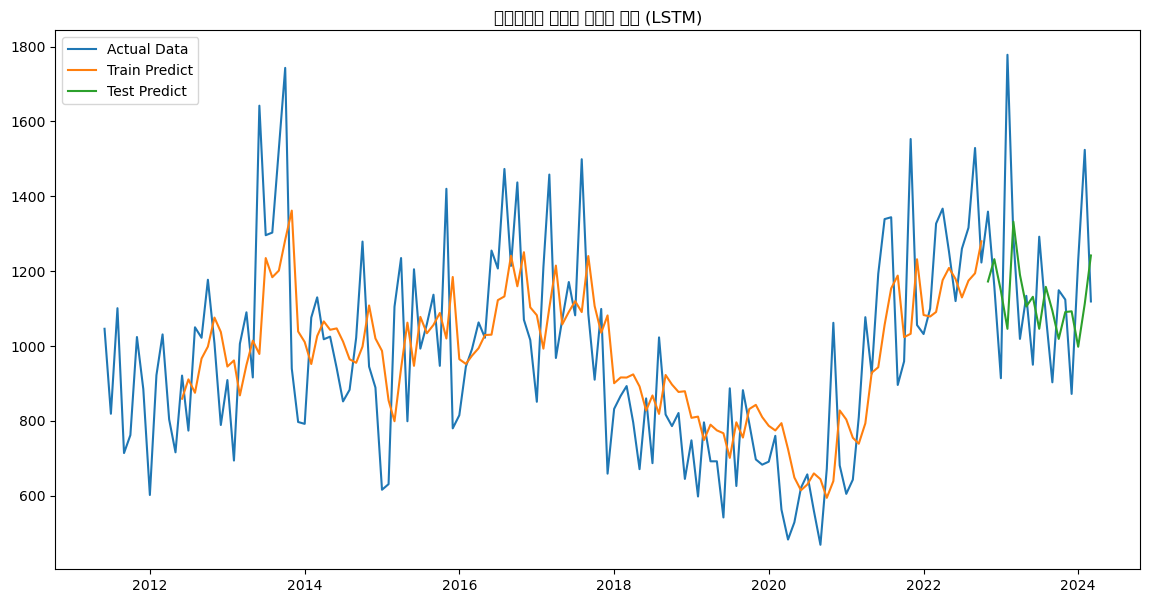

(204.61711993197702, 254.61570869521094)

In [354]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Load the data
file_path = '구인인원피봇.csv'
data = pd.read_csv(file_path)

# Selecting '서울특별시 종로구' column and converting '월' column to datetime
data['월'] = pd.to_datetime(data['월'])
data.set_index('월', inplace=True)
y = data['서울특별시 종로구']

# Normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
y_scaled = scaler.fit_transform(y.values.reshape(-1, 1))

# Convert the dataset into a suitable shape for LSTM
def create_dataset(data, time_step=1):
    X, Y = [], []
    for i in range(len(data) - time_step):
        a = data[i:(i + time_step), 0]
        X.append(a)
        Y.append(data[i + time_step, 0])
    return np.array(X), np.array(Y)

time_step = 12
X, Y = create_dataset(y_scaled, time_step)

# Split the data into training and testing sets
train_size = 125
X_train, X_test = X[:train_size], X[train_size:]
Y_train, Y_test = Y[:train_size], Y[train_size:]

# Reshape input to be [samples, time steps, features] which is required for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, Y_train, epochs=50, batch_size=1, verbose=1)

# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Transform back to original scale
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict.reshape(-1, 1))
Y_train = scaler.inverse_transform(Y_train.reshape(-1, 1))
Y_test = scaler.inverse_transform(Y_test.reshape(-1, 1))

# Evaluate the model
train_rmse = np.sqrt(mean_squared_error(Y_train, train_predict))
test_rmse = np.sqrt(mean_squared_error(Y_test, test_predict))

# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(y.index, y.values, label='Actual Data')
plt.plot(y.index[time_step:train_size + time_step], train_predict, label='Train Predict')
plt.plot(y.index[train_size + time_step:], test_predict, label='Test Predict')
plt.legend()
plt.title('서울특별시 종로구 시계열 예측 (LSTM)')
plt.show()

train_rmse, test_rmse

Epoch 1/50


C:\Download\anaconda\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


125/125 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0301
Epoch 2/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0209
Epoch 3/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0181
Epoch 4/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0185
Epoch 5/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0174
Epoch 6/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0126
Epoch 7/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0189
Epoch 8/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0192
Epoch 9/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0174
Epoch 10/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0135
Epoch 11/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0188
Epoch 12/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0149
Epoch 13/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0154
Epoch 14/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0186
Epoch 15/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0145


C:\Download\anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49436 (\N{HANGUL SYLLABLE SEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Download\anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50872 (\N{HANGUL SYLLABLE UL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Download\anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 53945 (\N{HANGUL SYLLABLE TEUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Download\anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Download\anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Download\anaconda\lib\site-packages\IPyth

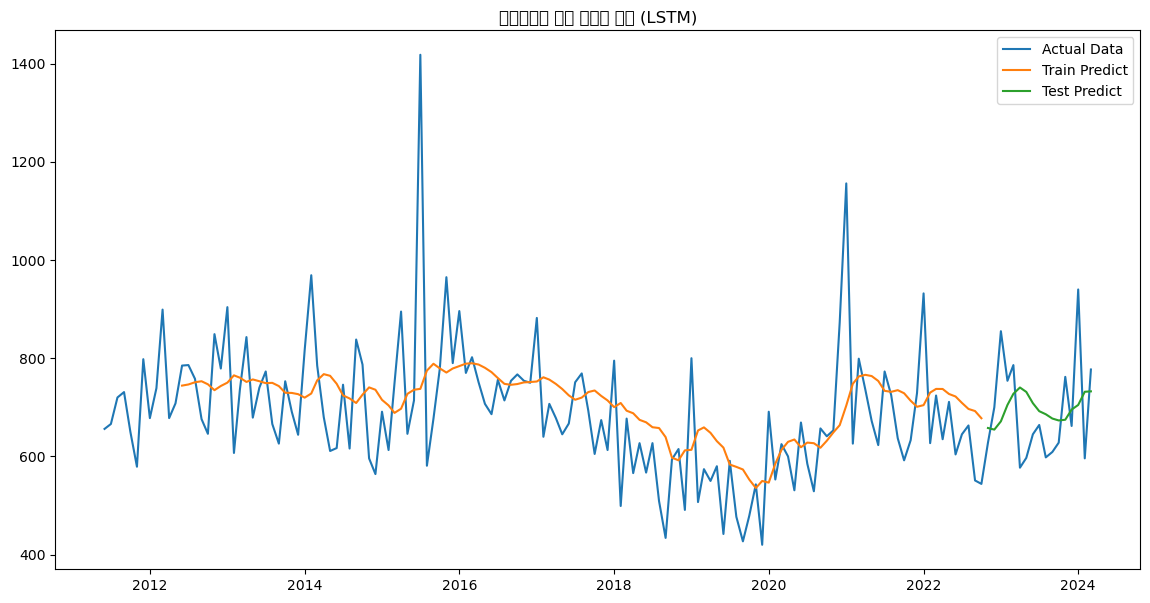

(122.61102604641059, 105.96073278966809)

In [5]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Load the data
file_path = '구직건수피봇.csv'
data = pd.read_csv(file_path)

# Selecting '서울특별시 종로구' column and converting '월' column to datetime
data['월'] = pd.to_datetime(data['월'])
data.set_index('월', inplace=True)
y = data['서울특별시 종로구']

# Normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
y_scaled = scaler.fit_transform(y.values.reshape(-1, 1))

# Convert the dataset into a suitable shape for LSTM
def create_dataset(data, time_step=1):
    X, Y = [], []
    for i in range(len(data) - time_step):
        a = data[i:(i + time_step), 0]
        X.append(a)
        Y.append(data[i + time_step, 0])
    return np.array(X), np.array(Y)

time_step = 12
X, Y = create_dataset(y_scaled, time_step)

# Split the data into training and testing sets
train_size = 125
X_train, X_test = X[:train_size], X[train_size:]
Y_train, Y_test = Y[:train_size], Y[train_size:]

# Reshape input to be [samples, time steps, features] which is required for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, Y_train, epochs=50, batch_size=1, verbose=1)

# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Transform back to original scale
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict.reshape(-1, 1))
Y_train = scaler.inverse_transform(Y_train.reshape(-1, 1))
Y_test = scaler.inverse_transform(Y_test.reshape(-1, 1))

# Evaluate the model
train_rmse = np.sqrt(mean_squared_error(Y_train, train_predict))
test_rmse = np.sqrt(mean_squared_error(Y_test, test_predict))

# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(y.index, y.values, label='Actual Data')
plt.plot(y.index[time_step:train_size + time_step], train_predict, label='Train Predict')
plt.plot(y.index[train_size + time_step:], test_predict, label='Test Predict')
plt.legend()
plt.title('서울특별시 종로구 시계열 예측 (LSTM)')
plt.show()

train_rmse, test_rmse